In [35]:
'''
@Description: 
@Author: YuanZi
@Github: https://github.com/yzmean
@Date: 2019-07-07 00:02:05
@LastEditTime: 2019-07-07 16:45:27
'''
import pandas as  pd
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from pylab import mpl
from matplotlib.backends.backend_pdf import PdfPages

mpl.rcParams['axes.unicode_minus']=False #用来正常显示负号
mpl.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签
plt.rcParams['font.sans-serif']=['SimHei'] #用来正常显示中文标签

t = list(os.walk('/Users/yuanzi/学习/yz/COPD/COPD_DATA/olds_modification'))[0][2]
t.sort()

methods = ['pearson','kendall','spearman']
for _method in methods:
    with PdfPages(_method+'.pdf') as pdf:
        for fname in t[1:]:
            print(fname)
            df = pd.read_csv('/Users/yuanzi/学习/yz/COPD/COPD_DATA/olds_modification/'+fname
                            ,engine='python'
                            ,encoding='utf8'
                            ,index_col='date'
                            ,usecols = [0,1,3,5,6,7,8])
            df.dropna(axis=0, how='any', inplace=True)
            #_method = 'pearson'
            corr = df.corr(method=_method)
        #     corr = df.corr(method='kendall')
        #     corr = df.corr(method='spearman')
            # Generate a mask for the upper triangle
            mask = np.zeros_like(corr, dtype=np.bool)
            mask[np.triu_indices_from(mask)] = True

            # Set up the matplotlib figure
            f, ax = plt.subplots(figsize=(20, 13))

            # Generate a custom diverging colormap
            cmap = sns.diverging_palette(220, 10, as_cmap=True)

            # Draw the heatmap with the mask and correct aspect ratio
            sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.9, center=0,
                        square=True, linewidths=.5, cbar_kws={"shrink": .5})
            plt.title(fname+' '+_method)
            pdf.savefig()
            plt.close()
            #     print(df.corr(method='kendall').iloc[1][2])

26261.csv
26313.csv
26314.csv
26315.csv
26920.csv
26921.csv
28089.csv
30581.csv
30592.csv
30629.csv
31010.csv
31011.csv
32441good.csv
32542.csv
33365.csv
44116.csv
44624.csv
44626.csv
44629.csv
44631.csv
44634.csv
44635.csv
44636.csv
44637.csv
44639.csv
44640.csv
44641.csv
44643.csv
44645.csv
44646.csv
44647.csv
44648.csv
44649.csv
44651.csv
44653.csv
44656.csv
44660.csv
44661.csv
45572.csv
45600.csv
46260.csv
46261.csv
46351.csv
46573.csv
46577.csv
46603.csv
46661.csv
46678.csv
46686.csv
46693.csv
46700.csv
46702.csv
46703.csv
46704.csv
46705.csv
46707.csv
46708.csv
46709.csv
46711.csv
46712.csv
46713.csv
46734.csv
46811.csv
46814.csv
46823.csv
46824.csv
46825.csv
46826.csv
46827.csv
46828.csv
46849.csv
46852.csv
46853.csv
46873.csv
46898.csv
46943.csv
46971.csv
46973.csv
47016.csv
47017.csv
47026.csv
47089.csv
47119.csv
47139.csv
47149.csv
47158.csv
47163.csv
47169.csv
47199.csv
47205.csv
47207.csv
47216.csv
47222.csv
47226.csv
47238.csv
47247.csv
47256.csv
47257.csv
47297.csv
47326.

In [12]:
print(df.corr(method='kendall'))

             体温       呼吸率        脉率     血压(低)     血压(高)     血氧饱和度
体温     1.000000  0.050516  0.051068  0.065354  0.083029  0.062969
呼吸率    0.050516  1.000000  0.657036  0.229513  0.306701  0.128167
脉率     0.051068  0.657036  1.000000  0.186411  0.234437  0.062135
血压(低)  0.065354  0.229513  0.186411  1.000000  0.281133  0.039152
血压(高)  0.083029  0.306701  0.234437  0.281133  1.000000  0.012723
血氧饱和度  0.062969  0.128167  0.062135  0.039152  0.012723  1.000000


In [8]:
print(df.corr())

             体温       呼吸率        脉率     血压(低)     血压(高)     血氧饱和度
体温     1.000000  0.133529  0.087469  0.055932  0.123347  0.156219
呼吸率    0.133529  1.000000  0.141382  0.139963  0.152242  0.101505
脉率     0.087469  0.141382  1.000000  0.297202  0.256379  0.100218
血压(低)  0.055932  0.139963  0.297202  1.000000  0.309292  0.031123
血压(高)  0.123347  0.152242  0.256379  0.309292  1.000000 -0.001212
血氧饱和度  0.156219  0.101505  0.100218  0.031123 -0.001212  1.000000


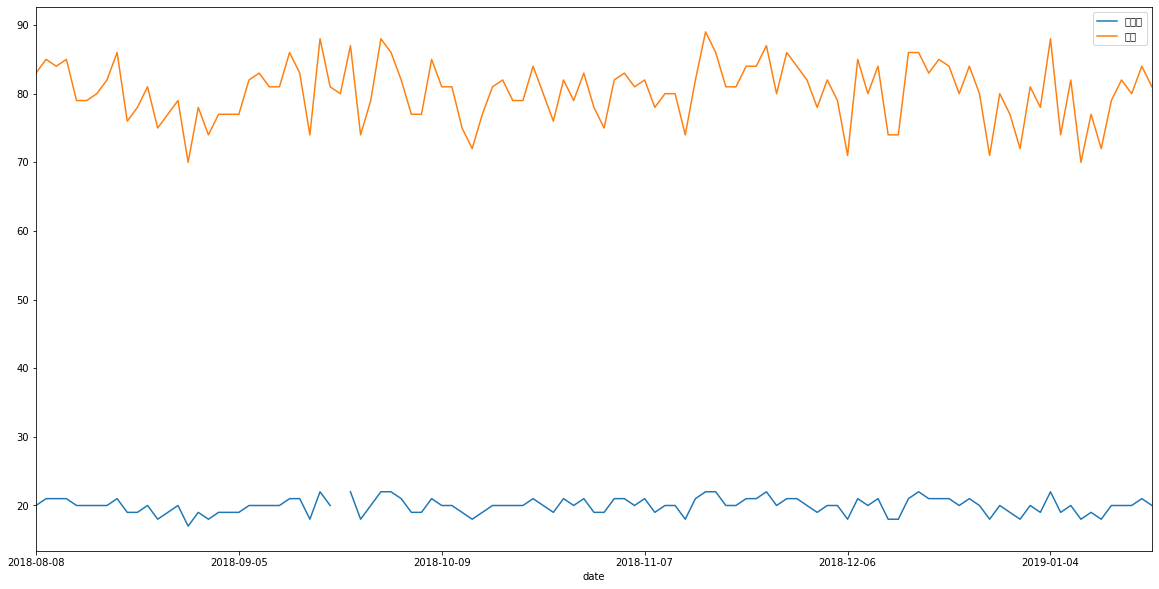

In [21]:
df1 = pd.read_csv('/Users/yuanzi/学习/yz/COPD/COPD_DATA/olds_modification/55783.csv',engine='python'
                    ,encoding='utf8'
                    )
df1.plot(x='date',y=['呼吸率','脉率'],figsize=(20,10))
plt.show()